# Capstone project: Titanic Survival Prediction

In [ ]:
# Capstone project: Titanic Survival Prediction

# Data Dictionary

| Variable   | Definition                       | Key                                           |
|------------|-----------------------------------|-----------------------------------------------|
| survival   | Survival                         | 0 = No, 1 = Yes                               |
| pclass     | Ticket class                     | 1 = 1st, 2 = 2nd, 3 = 3rd                     |
| gender        | Gender                              |                                               |
| Age        | Age in years                     |                                               |
| sibsp      | # of siblings/spouses aboard     |                                               |
| parch      | # of parents/children aboard     |                                               |
| ticket     | Ticket number                    |                                               |
| fare       | Passenger fare                   |                                               |
| cabin      | Cabin number                     |                                               |
| embarked   | Port of Embarkation              | C = Cherbourg, Q = Queenstown, S = Southampton |

---

## Variable Notes

- **pclass**: A proxy for socio-economic status (SES)  
  - 1st = Upper  
  - 2nd = Middle  
  - 3rd = Lower  

- **age**:  
  - Age is fractional if less than 1.  
  - If the age is estimated, it is in the form of `xx.5`.

- **sibsp**: The dataset defines family relations as follows:  
  - Sibling = brother, sister, stepbrother, stepsister  
  - Spouse = husband, wife (mistresses and fiancés were ignored)  

- **parch**: The dataset defines family relations as follows:  
  - Parent = mother, father  
  - Child = daughter, son, stepdaughter, stepson  
  - Some children travelled only with a nanny; therefore, `parch=0` for them.


# Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set the style
plt.style.use('fivethirtyeight')

df = pd.read_csv('/content/Titanic-Dataset.csv') # Read the dataset.
df.head()

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
gender,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.isna().mean() * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
gender,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
df['Age'].median()

28.0

In [ ]:
df['Age'].mode()

,Age
0,24.0


In [ ]:
df['Age'] = df['Age'].fillna(28)
df = df.drop(columns=['Cabin'])
df.isna().mean() * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
gender,0.000000
Age,0.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
df['Embarked'] = df['Embarked'].fillna('S')
df.isna().mean() * 100

,0
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
gender,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df = df.drop(columns=['Name','PassengerId'])
df.head()

,Survived,Pclass,gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Define label column and get value counts
label_col_name = 'Survived'
value_counts = df[label_col_name].value_counts()

# Create Pie Chart
fig_pie = px.pie(names=value_counts.index, values=value_counts.values,
                 title=f'Pie Chart of "{label_col_name}"',
                 labels={str(i): f'Category {i}' for i in value_counts.index})

# Display the plots
fig_pie.show()

# Encoding categorical variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   gender    891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
df.dtypes

,0
Survived,int64
Pclass,int64
gender,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Embarked,object


In [ ]:
df['gender'].value_counts()

,count
gender,
male,577
female,314


In [ ]:
df['gender'] = df['gender'].map({'male':0,'female':1})
df['gender'].value_counts()

,count
gender,
0,577
1,314


In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [ ]:
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})
df['Embarked'].value_counts()

,count
Embarked,
0,646
1,168
2,77


In [ ]:
df['Ticket'].value_counts()

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


In [ ]:
df['Ticket'].nunique()

681

In [ ]:
df.shape

(891, 9)

In [ ]:
(df['Ticket'].value_counts().shape[0] / df.shape[0]) * 100

76.43097643097643

In [ ]:
df = df.drop(columns=['Ticket'])
df.head()

,Survived,Pclass,gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Train test split

In [ ]:
X = df.drop(columns=['Survived'])
y = df[['Survived']]

In [ ]:
X.head()

,Pclass,gender,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [ ]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
X.shape,y.shape

((891, 7), (891, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.head()

,Pclass,gender,Age,SibSp,Parch,Fare,Embarked
513,1,1,54.0,1,0,59.4000,1
779,1,1,43.0,0,1,211.3375,0
247,2,1,24.0,0,2,14.5000,0
30,1,0,40.0,0,0,27.7208,1
411,3,0,28.0,0,0,6.8583,2


In [ ]:
y_train.head()

,Survived
513,1
779,1
247,1
30,0
411,0


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712, 1), (179, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.        , 1.        , 0.67225514, ..., 0.        , 0.11594108,
        0.5       ],
       [0.        , 1.        , 0.53359385, ..., 0.2       , 0.41250333,
        0.        ],
       [0.5       , 1.        , 0.29408799, ..., 0.4       , 0.02830212,
        0.        ],
       ...,
       [1.        , 1.        , 0.23106013, ..., 0.        , 0.01533038,
        0.        ],
       [1.        , 0.        , 0.34451027, ..., 0.        , 0.0165095 ,
        1.        ],
       [1.        , 0.        , 0.34451027, ..., 0.        , 0.01571255,
        0.        ]])

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712, 1), (179, 1))

In [ ]:
label = y_test['Survived'].unique()
label

array([0, 1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9817415730337079
Test Accuracy: 0.7541899441340782


In [ ]:
accuracy_score_list = []

for i in range(1,20,2):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_score_list.append([i,train_accuracy,test_accuracy])

df = pd.DataFrame(accuracy_score_list,columns=['n_neighbors','train_accuracy','test_accuracy'])
df

,n_neighbors,train_accuracy,test_accuracy
0,1,0.981742,0.754190
1,3,0.870787,0.759777
2,5,0.860955,0.776536
3,7,0.852528,0.776536
4,9,0.841292,0.765363
5,11,0.832865,0.776536
6,13,0.834270,0.787709
7,15,0.831461,0.787709
8,17,0.824438,0.787709
9,19,0.818820,0.770950


In [ ]:
df = df.sort_values(by='test_accuracy',ascending=False)
df

,n_neighbors,train_accuracy,test_accuracy
6,13,0.834270,0.787709
7,15,0.831461,0.787709
8,17,0.824438,0.787709
2,5,0.860955,0.776536
3,7,0.852528,0.776536
5,11,0.832865,0.776536
9,19,0.818820,0.770950
4,9,0.841292,0.765363
1,3,0.870787,0.759777
0,1,0.981742,0.754190


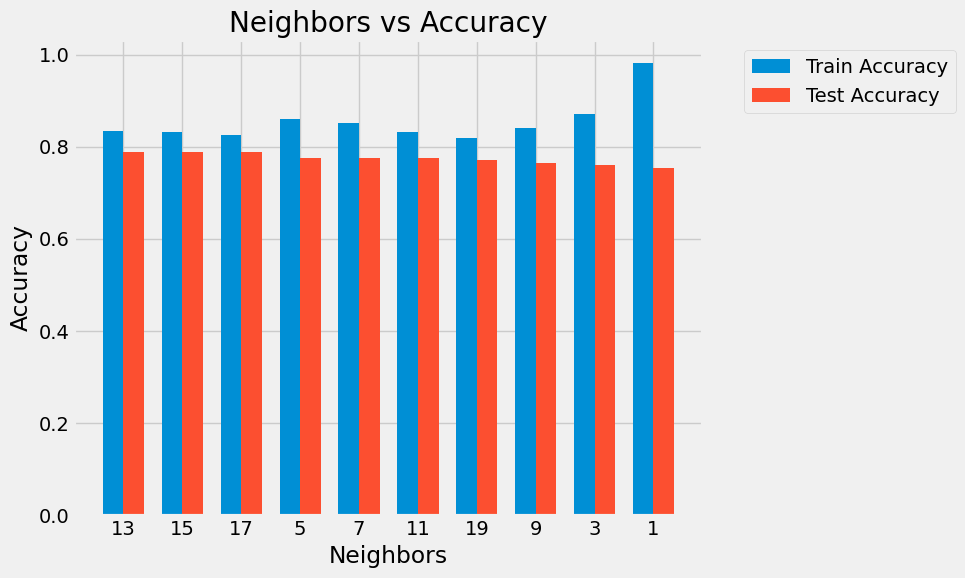

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

X_axis = np.arange(len(df['n_neighbors']))
width = 0.35

plt.bar(X_axis - width/2, df['train_accuracy'], width, label='Train Accuracy')
plt.bar(X_axis + width/2, df['test_accuracy'], width, label='Test Accuracy')

plt.xticks(X_axis, df['n_neighbors'])  # Set x-axis labels to 'n_neighbors' values
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.title('Neighbors vs Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside the plot
plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=13)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Make predictions
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.8342696629213483
Test Accuracy: 0.7877094972067039


In [ ]:
classifier

KNeighborsClassifier(n_neighbors=13)

In [ ]:
scaler

MinMaxScaler()

In [ ]:
import joblib
joblib.dump(classifier, 'knn_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

#Prediction

In [ ]:
X.head()

,Pclass,gender,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [ ]:
d = {'Pclass': 3,
 'gender': 0,
 'Age': 22.0,
 'SibSp': 1,
 'Parch': 0,
 'Fare': 7.25,
 'Embarked': 0}

In [ ]:
sample_data = pd.DataFrame([d])
sample_data

,Pclass,gender,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.25,0


In [ ]:
scaled_data = scaler.transform(sample_data)
scaled_data

array([[1.        , 0.        , 0.26887684, 0.125     , 0.        ,
        0.01415106, 0.        ]])

In [ ]:
classifier.predict(scaled_data)[0]

0

In [ ]:
classifier.predict_proba(scaled_data)[0]

array([0.92307692, 0.07692308])

In [ ]:
def predict_survival(d):
    sample_data = pd.DataFrame([d])
    scaled_data = scaler.transform(sample_data)
    pred = classifier.predict(scaled_data)[0]
    prob = classifier.predict_proba(scaled_data)[0][pred]
    return pred,prob

In [ ]:
d = {'Pclass': 3,
 'gender': 0,
 'Age': 50.0,
 'SibSp': 1,
 'Parch': 0,
 'Fare': 7.25,
 'Embarked': 0}

pred,prob = predict_survival(d)
pred,prob

(0, 0.8461538461538461)

#Deploy

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the pre-trained classifier and scaler using joblib
classifier = joblib.load('knn_model.joblib')
scaler = joblib.load('scaler.joblib')

# Define the prediction function
def predict_survival(d):
    sample_data = pd.DataFrame([d])
    scaled_data = scaler.transform(sample_data)
    pred = classifier.predict(scaled_data)[0]
    prob = classifier.predict_proba(scaled_data)[0][pred]
    return pred, prob

# Streamlit UI components
st.title("Titanic Survival Prediction")

# Input fields for each parameter
pclass = st.selectbox("Pclass", [1, 2, 3], index=2)
gender = st.selectbox("Gender", ["male", "female"], index=0)
age = st.number_input("Age", min_value=0.0, max_value=100.0, value=50.0, step=0.1)
sibsp = st.number_input("SibSp", min_value=0, max_value=10, value=1)
parch = st.number_input("Parch", min_value=0, max_value=10, value=0)
fare = st.number_input("Fare", min_value=0.0, max_value=500.0, value=7.25, step=0.1)
embarked = st.selectbox("Embarked", ["S", "C", "Q"], index=0)

# Map the gender and embarked values to numeric
gender_map = {'male': 0, 'female': 1}
embarked_map = {'S': 0, 'C': 1, 'Q': 2}

# Create the input dictionary for prediction
input_data = {
    'Pclass': pclass,
    'gender': gender_map[gender],
    'Age': age,
    'SibSp': sibsp,
    'Parch': parch,
    'Fare': fare,
    'Embarked': embarked_map[embarked]
}

# When the user clicks the "Predict" button
if st.button("Predict"):
    with st.spinner('Making prediction...'):
        pred, prob = predict_survival(input_data)

        if pred == 1:
            # Survived
            st.success(f"Prediction: Survived with probability {prob:.2f}")
        else:
            # Not survived
            st.error(f"Prediction: Did not survive with probability {prob:.2f}")

Writing app.py


In [ ]:
%%writefile requirements.txt
streamlit
pandas==2.2.2
joblib==1.4.2
scikit-learn==1.6.0

Writing requirements.txt


In [ ]:
!python -V

Python 3.10.12


In [ ]:
# Assignment: Perform indepth anlysis on titanic data using pandas, matplotlib and seaborn

In [ ]:
# Other deployment can be done
# 1. Heart disease
# 2. Flower type prediction (setosa, versicolor or verginica)
# 3. Email spam classification
# 4. House price prediction (regression)